In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train[0].dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


In [4]:
#reshape
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

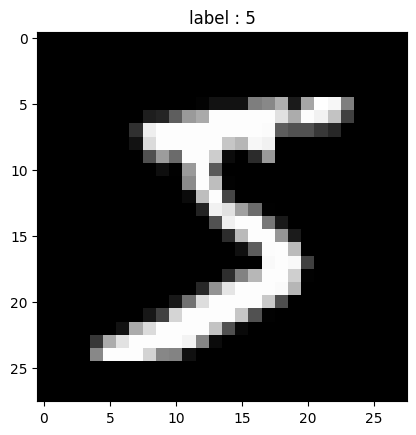

In [5]:
#vizualize 

import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [8]:
#preprocessing 

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min()) 

1.0
0.0


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print("Original label: {}".format(y_train.shape)) # (60000,)
print("One hot train label: {}".format(y_train_one_hot.shape)) # (60000, 10)
print("One hot test label: {}".format(y_test_one_hot.shape))

Original label: (60000,)
One hot train label: (60000, 10)
One hot test label: (10000, 10)


C:\Users\Keun Ho Ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:

def one_hot(y):
    C = np.unique(y).size
    y_hot = np.eye(C)[:,y.reshape(-1)]
    
    return y_hot

In [11]:

X_train = X_train.T
X_test = X_test.T
y_train_one_hot = y_train_one_hot.T
y_test_one_hot = y_test_one_hot.T

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(784, 60000)
(784, 10000)
(10, 60000)
(10, 10000)


In [13]:
#[Problem 1 2 3 4] Initialize Weight, Forward Propagation, Cross Entropy Error, Backward Propagation

In [14]:
def GetMiniBatch(X, Y, batch_size):
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    mini_batches = []
    m = X.shape[1]
    # Shuffle
    permute = np.random.permutation(m)
    X = X[:,permute]
    Y = Y[:,permute]
    
    # Partition
    complete_batches = math.floor(m/batch_size)
    for k in range(complete_batches):
        batch_X = X[:,k*batch_size:(k+1)*batch_size]
        batch_Y = Y[:,k*batch_size:(k+1)*batch_size]
        batch = (batch_X,batch_Y)
        mini_batches.append(batch)
        
    # Handling the end case
    if m % batch_size != 0:
        batch_X = X[:,(k+1)*batch_size:]
        batch_Y = Y[:,(k+1)*batch_size:]
        batch = (batch_X,batch_Y)
        mini_batches.append(batch)
        
    return mini_batches

In [15]:
#Initialize Weight
layers = [10, 5, 3, 1]
n_features = 5
sigma = 0.01
params = {}

for l in range(1, len(layers)):

    params['W' + str(l)] = sigma * np.random.randn(layers[l], layers[l-1])
    params['b' + str(l)] = sigma * np.random.randn(layers[l],1)

params
     

{'W1': array([[-1.44247225e-02, -8.25647432e-03,  1.50340661e-02,
          4.67116009e-03,  1.00613670e-03, -1.42153808e-03,
         -7.08193143e-03,  9.86638800e-03, -3.21020528e-03,
         -7.41812623e-04],
        [ 7.83426036e-03,  1.61161607e-03,  1.23888711e-02,
          7.77231979e-03, -1.06151006e-03, -9.18923426e-03,
         -4.69925250e-03, -5.62266916e-03, -8.04805568e-03,
          2.40536845e-03],
        [-1.08339033e-02, -2.35173343e-03,  6.14431675e-03,
          4.78952862e-03, -7.47974581e-03,  5.11810376e-03,
         -2.49420336e-03, -1.90082110e-02,  8.80236175e-03,
          9.21469191e-03],
        [-9.02905911e-03, -3.28522175e-04,  9.49223031e-05,
         -5.17444824e-03,  1.27885048e-02, -1.65851302e-03,
          5.92860671e-03, -9.59360659e-03,  1.88886174e-03,
         -5.61205982e-04],
        [ 1.12693490e-03, -6.75835664e-03,  2.74097912e-03,
         -6.51229718e-03,  6.98330774e-03,  4.27213552e-03,
         -3.17144700e-03,  5.12579308e-03, -1.

In [17]:
#[Problem 6 7] Learning and Estimation, Learning Curve Plot
layers = [X_train.shape[0], 400, 200, 10]
lr = 0.001
sigma = 0.01
batch = 20
epochs = 3

nn = ScratchSimpleNeuralNetrowkClassifier(layers, lr=lr, sigma=sigma, batch_size=batch, epochs=epochs, verbose=True)

Batch size: 20
Iteration: 3000.0
Cost after epoch 0: 0.2297737806960373
Cost after epoch 1: 0.2283701839472709
Cost after epoch 2: 0.22375587920318435


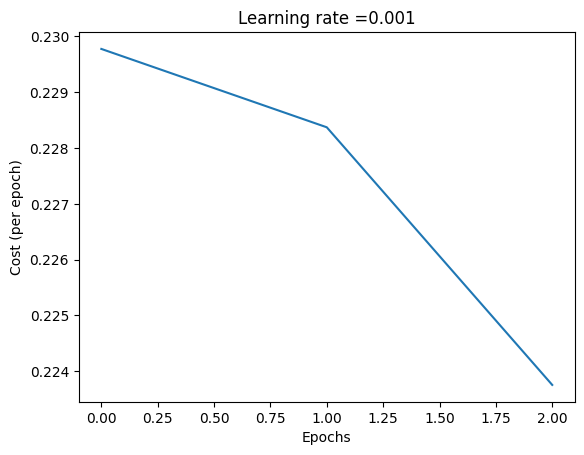

In [18]:
param = nn.fit(X_train, y_train_one_hot)

In [19]:
pred_y = nn.predict(X_test, param)
pred_y

array([7, 0, 1, ..., 7, 1, 0], dtype=int64)

Batch size: 50
Iteration: 1200.0
Cost after epoch 0: 0.23006013937243178
Cost after epoch 1: 0.2296867687598117
Cost after epoch 2: 0.22924002200291863
Cost after epoch 3: 0.22863654156973814
Cost after epoch 4: 0.22772713629992022
Cost after epoch 5: 0.22620595868617305
Cost after epoch 6: 0.22337489679406664
Cost after epoch 7: 0.21754040935588767
Cost after epoch 8: 0.20498821926702962
Cost after epoch 9: 0.18213682180803661


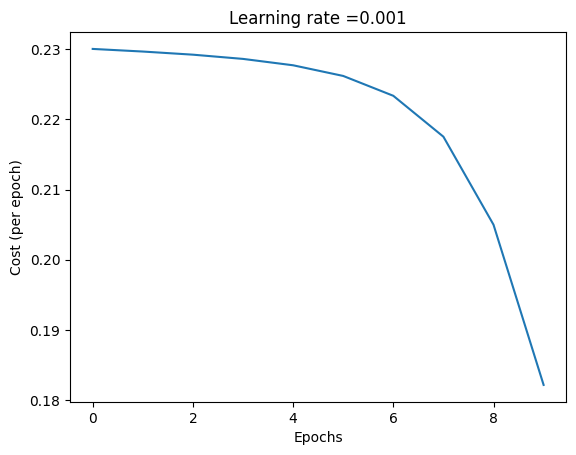

In [20]:
layers = [X_train.shape[0], 400, 200, 10]
lr = 0.001
sigma = 0.01
batch = 50
epochs = 10

nn2 = ScratchSimpleNeuralNetrowkClassifier(layers, lr=lr, sigma=sigma, batch_size=batch, epochs=epochs, verbose=True)
param2 = nn2.fit(X_train, y_train_one_hot)

In [21]:
nn2.accuracy(X_train, y_train, X_test, y_test, param2)

Training set accuracy: 48.21%
Testing set accuracy: 47.97%


In [22]:
layers = [X_train.shape[0], 400, 200, 10]
lr = 0.01
sigma = 0.01
batch = 256
epochs = 100

nn3 = ScratchSimpleNeuralNetrowkClassifier(layers, lr=lr, sigma=sigma, batch_size=batch, epochs=epochs, verbose=True)

Batch size: 256
Iteration: 234.0
Cost after epoch 0: 0.23086563557970652
Cost after epoch 1: 0.2299586272929834
Cost after epoch 2: 0.22811157526679549
Cost after epoch 3: 0.22233271790888243
Cost after epoch 4: 0.1987452845574233
Cost after epoch 5: 0.1509087043538104
Cost after epoch 6: 0.11508163908141356
Cost after epoch 7: 0.09347830644212417
Cost after epoch 8: 0.08024566391936219
Cost after epoch 9: 0.07171029576953707
Cost after epoch 10: 0.06560206270761387
Cost after epoch 11: 0.060861198179001895
Cost after epoch 12: 0.05697358399766964
Cost after epoch 13: 0.05368376419572702
Cost after epoch 14: 0.050875022210377284
Cost after epoch 15: 0.048490640999211757
Cost after epoch 16: 0.04648272731786796
Cost after epoch 17: 0.04479463320490584
Cost after epoch 18: 0.04336587712874721
Cost after epoch 19: 0.042141758789520166
Cost after epoch 20: 0.04107827674491573
Cost after epoch 21: 0.0401421750895264
Cost after epoch 22: 0.039308837869591065
Cost after epoch 23: 0.0385599197

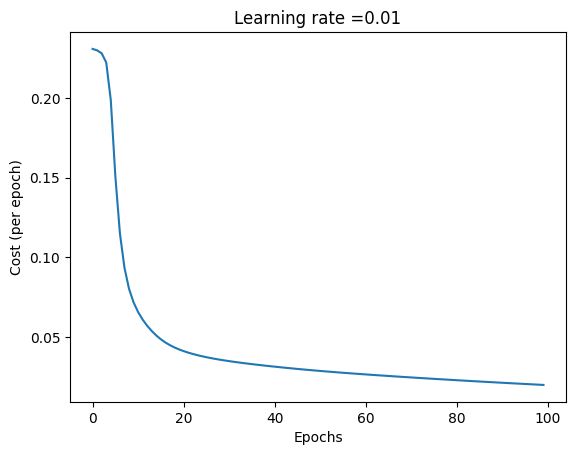

In [23]:
param3 = nn3.fit(X_train, y_train_one_hot)

In [24]:
nn3.accuracy(X_train, y_train, X_test, y_test, param3)

Training set accuracy: 94.34%
Testing set accuracy: 94.27%


In [25]:
#[Problem 8] (Advance assignment) Confirmation of misclassification
pred_y3 = nn3.predict(X_test, param3)
pred_y3

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

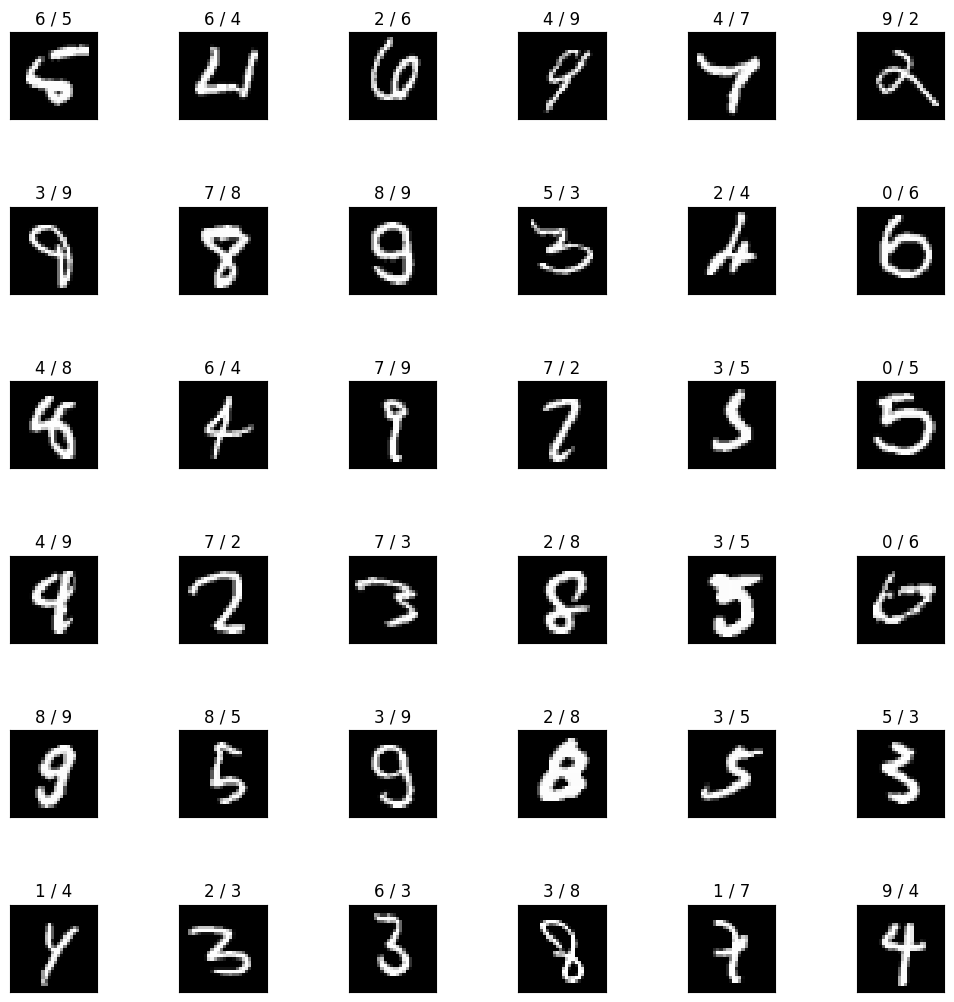

In [27]:

"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".
Parameters:
----------
y_pred : Estimated ndarray (n_samples,)
y_val : Correct label of verification data (n_samples,)
X_val : Verification data features (n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # How many to display
X_val = X_test
true_false = pred_y3==y_test
false_list = np.where(true_false==False)[0].astype(int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(pred_y3[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_val.T[false_list[i]].reshape(28,28), cmap='gray')